In [1]:
using ConstraintPropagation, ValidatedNumerics

INFO: Recompiling stale cache file /Users/dpsanders/.julia/lib/v0.4/ConstraintPropagation.ji for module ConstraintPropagation.


In [2]:
include("draw_boxes.jl")

/Users/dpsanders/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


draw_boxes (generic function with 4 methods)

In [34]:
S1 = @constraint x^2 + y^2 <= 1

Separator:
  - variables: [:x,:y]

In [3]:
function draw(inner)
    draw_boxes(inner, "green", 0.5)
    axis("image")
end

function draw(inner, boundary)
    draw_boxes(inner, "green", 0.5)
    draw_boxes(boundary, "gray", 0.5)
    axis("image")
end

draw (generic function with 3 methods)

In [4]:
X = IntervalBox(-100..100, -100..100)
inner, boundary = set_inversion(S1, X, ldexp(1., -6))
draw(inner)

LoadError: LoadError: UndefVarError: S1 not defined
while loading In[4], in expression starting on line 2

In [12]:
@time inner, boundary = set_inversion(S1, X, ldexp(1., -6));


  0.209378 seconds (1.57 M allocations: 46.505 MB, 13.95% gc time)


In [23]:
pygui(true)

true

In [26]:
ion()
clf()
for n in 1:length(inner)
    draw_boxes(inner[n:n+1], "green", 0.2)
    sleep(0.1)
    axis("image")
    
end

In [6]:
inner

0-element Array{ValidatedNumerics.IntervalBox{2,Float64},1}

In [14]:
area(X::IntervalBox) = prod(map(diam, X))

function area(inner, boundary)
    lower = sum(map(area, inner))
    upper = lower + sum(map(area, boundary)) 
    return hull(lower, upper)
end

area (generic function with 2 methods)

Calculate area of inner and boundary pavings:

In [15]:
X = IntervalBox(-2..2, -2..2)

for i in 2:10

    @time inner, boundary = set_inversion(S1, X, ldexp(1., -i))
    @show i, area(inner, boundary), length(inner), length(boundary)
end

  0.011396 seconds (100.93 k allocations: 2.994 MB)
(i,area(inner,boundary),length(inner),length(boundary)) = (2,[2.92837, 3.31564],32,36)
  0.031480 seconds (199.37 k allocations: 5.916 MB, 28.09% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (3,[3.03985, 3.2335],68,72)
  0.045924 seconds (395.38 k allocations: 11.731 MB)
(i,area(inner,boundary),length(inner),length(boundary)) = (4,[3.09195, 3.18877],140,144)
  0.101517 seconds (786.51 k allocations: 23.331 MB, 13.77% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (5,[3.11708, 3.16549],284,288)
  0.217646 seconds (1.57 M allocations: 46.505 MB, 14.10% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (6,[3.12941, 3.15362],572,576)
  0.432683 seconds (3.13 M allocations: 92.826 MB, 16.19% gc time)
(i,area(inner,boundary),length(inner),length(boundary)) = (7,[3.13552, 3.14763],1148,1152)
  0.821639 seconds (6.25 M allocations: 185.441 MB, 13.69% gc time)
(i,area(inner,boundary),l

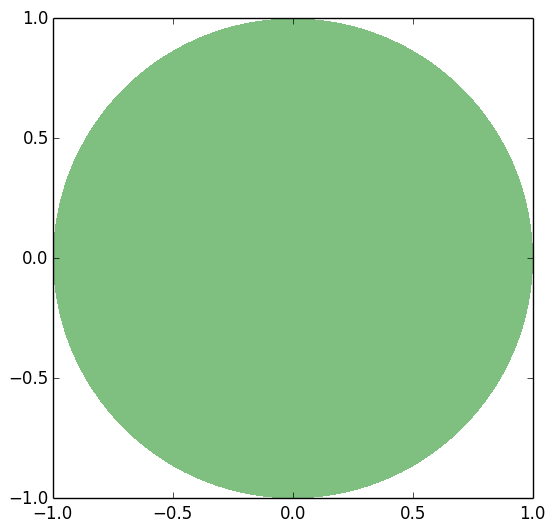

(-0.999998569487502,0.9999985694875023,-0.9999995231627279,0.9999995231627279)

In [13]:
draw(inner)

In [19]:
length(inner)

8628

  1.848361 seconds (6.32 M allocations: 211.844 MB, 5.36% gc time)


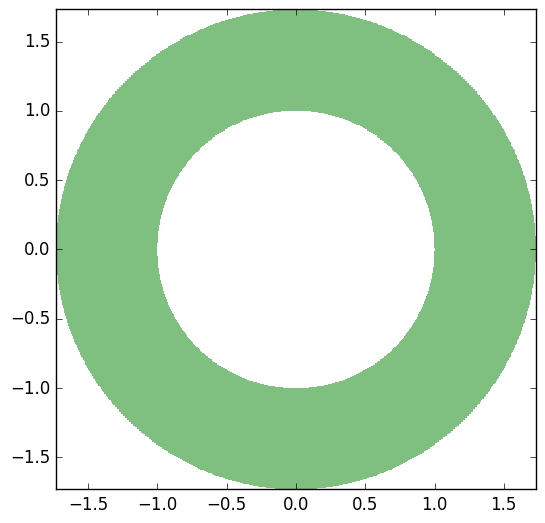

(-1.7320111636183058,1.7320111636183055,-1.731997948766467,1.731997948766467)

In [6]:
X = IntervalBox(-100..100, -100..100)
S2 = @constraint 1 <= x^2 + y^2 <= 3
@time inner, boundary = set_inversion(S2, X, ldexp(1., -6))
draw(inner)

In [35]:
@time inner, boundary = set_inversion(S2, X, ldexp(1., -3));

  0.105208 seconds (625.90 k allocations: 18.664 MB, 29.18% gc time)


## Animation 

In [9]:
pygui(true)

true

In [33]:
ion()
for n in 1:length(inner)
    draw_boxes([inner[n]], "green", 0.2, 1)
    draw_boxes([boundary[n]], "grey", 0.2, 0.1)
    
    sleep(0.00001)
    if n==1
        axis("image")
        xlim(-2, 2)
        ylim(-2, 2)
    end
    show()
end

2016-05-24 00:05:17.068 julia[37236:279254] setCanCycle: is deprecated.  Please use setCollectionBehavior instead
2016-05-24 00:05:17.075 julia[37236:279254] setCanCycle: is deprecated.  Please use setCollectionBehavior instead


In [27]:
length(inner)

336

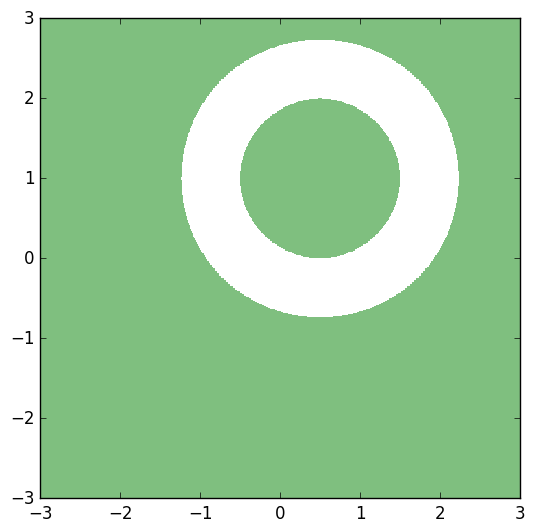

(-3.0,3.0,-3.0,3.0)

In [18]:
S3 =  @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S3c = !S3  # complement

Y = IntervalBox(-3..3, -3..3)
inner, boundary = set_inversion(S3c, Y, ldexp(1., -5))
draw(inner)


In [ ]:
setprecision(Interval, Float64)
X = IntervalBox(-3..3, -3..4)
S2 = @constraint 1 <= x^2 + y^2 <= 3
S4 = @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∪ S4

inner, boundary = set_inversion(S24, X, ldexp(1., -1))
#draw(inner, boundary)
draw(inner)
axis("image")


In [10]:
X = IntervalBox(-100..100, -100..100)
S4 = @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
inner, boundary = set_inversion(S4, X, ldexp(1., -3));
#draw(inner)
#axis("image")

(165-elementArray{ValidatedNumerics.IntervalBox{2,Float64},1}:
 [1.59149, 1.70423] × [2.125, 2.24493]
 [1.36602, 1.5915] × [2.125, 2.34486]
 [1.36602, 1.47876] × [2.34485, 2.429]
 [1.36602, 1.81696] × [1.75, 2.125]
 [1.81695, 1.8916] × [1.9375, 2.03125]
 [1.81695, 1.9564] × [1.75, 1.9375]
 [1.95639, 2.01265] × [1.75, 1.84375]
 [1.79903, 2.06125] × [1, 1.75]
 [2.06124, 2.10292] × [1.5625, 1.65625]
 [2.06124, 2.13817] × [1.375, 1.5625]
 [2.13816, 2.16742] × [1.375, 1.46875]
 [2.06124, 2.19097] × [1, 1.375]
 [2.19096, 2.20907] × [1.1875, 1.28125]
 [2.19096, 2.22188] × [1, 1.1875]
 [2.22187, 2.22952] × [1, 1.09375]
 [1.36602, 1.5] × [1.49999, 1.75]
 [1.5, 1.79904] × [1, 1.75]
 [1.46824, 1.5] × [1.25, 1.5]
 [1.42702, 1.46825] × [1.375, 1.5]
 [1.44991, 1.46825] × [1.3125, 1.375]
 [1.49215, 1.5] × [1.125, 1.25]
 [1.48226, 1.49216] × [1.1875, 1.25]
 [1.49804, 1.5] × [1.0625, 1.125]
 [0.5, 1.36603] × [2.11602, 2.5]
 [1.14951, 1.25778] × [2.49999, 2.5575]
 [0.933012, 1.14952] × [2.49999, 2.60566

In [14]:
@time inner, boundary = set_inversion(S4, X, ldexp(1., -3));


  0.110340 seconds (754.47 k allocations: 22.162 MB, 14.32% gc time)


In [ ]:
setprecision(Interval, Float64)
X = IntervalBox(-3..3, -3..4)
S2 = @constraint 1 <= x^2 + y^2 <= 3
S4 = @constraint 1 <= (x-0.5)^2 + (y-1)^2 <= 3
S24 = S2 ∩ S4
inner, boundary = set_inversion(S24, X, ldexp(1., -2))
draw(inner)
axis("image")

In [25]:
S24 = S2 ∩ S4

inner, boundary = set_inversion(S24, X, ldexp(1., -4))
draw(inner)


LoadError: LoadError: MethodError: `decompose` has no method matching decompose(::ValidatedNumerics.Interval{BigFloat})
while loading In[25], in expression starting on line 3

In [16]:
S5a = @constraint 1 >= x+y >= -1
S5b = @constraint x-y >= 1

S5 = S5a ∩ S5b

inner, boundary = set_inversion(S5, X, ldexp(1., -2))
draw(inner)

LoadError: LoadError: InterruptException:
while loading In[16], in expression starting on line 6

Example from Jaulin et al., "Applied Interval Analysis", pg. 61:

In [37]:
S6 = @constraint x1^2 * (x1^2 - 1) + 4*x2^2 ∈ [-0.1, 0.1]  # 4th power not yet working correctly in powerRev
Y = IntervalBox(-10..10, -10..10)

@time inner, boundary = set_inversion(S6, Y, ldexp(1., -3))


LoadError: LoadError: InterruptException:
while loading In[37], in expression starting on line 155

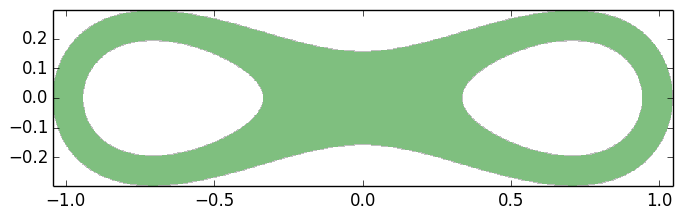

(-1.044921875,1.0449218749999998,-0.2978515625,0.29785156250000006)

In [34]:
draw(inner, boundary)